<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>

- Classification problems
- Nearest Neighbors (NN, $k$-NN)
- Naive Bayes Classifier

<hr/>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h1><font color="darkblue">Classification</font></h1>
<hr/>

- Based on a **training set** of labeled points, assign class labels to unknown vectors in the **query set**.  

> **Training set**
>
>$T = \big\{ (x_i, C_i) \big\}$ where $x_i\in \mathbb{R}^d$ and $C_i$ is the known class membership 

> **Query set**
>
>$Q = \big\{ x_i \big\}$ where $x_i\in \mathbb{R}^d$ 

> For example,
> blood tests ($x$) and sick/healthy ($C$) - we want to predict if a new patient is sick based on the available measurements

- Similar to regression but with discrete categories to classify into...

### Classification Methods

- [$k$-NN](https://scikit-learn.org/stable/modules/neighbors.html)
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/lda_qda.html)
- [Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [Decisions trees](https://scikit-learn.org/stable/modules/tree.html)
- [Random forests](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)
- [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)

### The Iris Dataset

- We'll use this data set available in [scikit-learn](http://scikit-learn.org/stable/index.html), see [this](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) page for details

In [ ]:
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()

[k for k in iris]

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [3]:
# Show the possible values of label
print (iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Description of the dataset
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
# Feature and label
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [7]:
print (type(iris.data))

# Shape of data 
print (iris.data.shape)

# Have a peek
print (iris.data[:5])
print (iris.target[:5])

<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


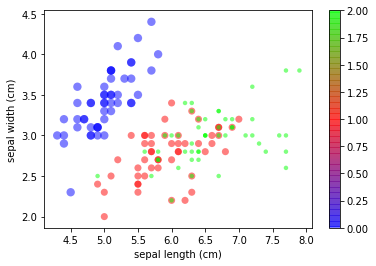

In [8]:
# Plot two features
i,j = 0,1

sizes = np.array([70,50,20])
scatter(iris.data[:,i], iris.data[:,j], edgecolor='none', c=iris.target, s=sizes[iris.target], cmap=cm.brg, alpha=0.5); 
colorbar()
xlabel(iris.feature_names[i])
ylabel(iris.feature_names[j])

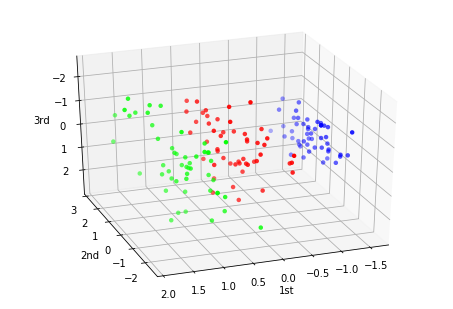

In [9]:
# See also http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# whiten the data and use top 3 components
pca = PCA(n_components=3, whiten=True)
b = pca.fit_transform(iris.data)

# 3D plot
fig = plt.figure(figsize=(6,4))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(b[:,0], b[:,1], b[:,2], c=iris.target, cmap=plt.cm.brg, edgecolor='none')
ax.set_xlabel("1st");
ax.set_ylabel("2nd");
ax.set_zlabel("3rd");


### Nearest Neighbor


- Assign label or value of nearest neighbor (NN) in the training set

> Simple but powerful

> <img src=https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg width=200>


- Naive and very slow nearest neighbor search (for illustration purposes only...)

In [ ]:
import datetime as dt

In [10]:
# Features and label
X = iris.data[:,:]
y = iris.target

print ('Unique classes:', np.unique(iris.target))

Unique classes: [0 1 2]


In [11]:
y_pred = -1 * np.ones(y.size)

start = dt.datetime.now()

# Loop on query set
for i in arange(y.size): 
    
    d2min = 1e99  # something large
    
    # loop on training set
    for j in arange(y.size):
        if i != j:               # leave one out
            d = X[i,:] - X[j,:]  # diff vector
            d2 = d.dot(d)        # its length squared
            if d2 < d2min:       # check if closer
                d2min = d2       # save it 
                y_pred[i] = y[j]

print ('Elapsed time', dt.datetime.now() - start)

print ("Number of mislabeled points out of a total %d points: %d" 
       % (iris.target.size, (y!=y_pred).sum()))

# write a faster version of this

Elapsed time 0:00:00.067996
Number of mislabeled points out of a total 150 points: 6


### $k$ Nearest Neighbors

- Assign label or value based $k$ nearest neighbors ($k$-NN) in the training set

> For example, the most frequent "vote" <br/> possibly with weighting


> <img src=https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg width=200>

- Using $k$ instead of a distance cutoff helps with large density contrasts



In [ ]:
from sklearn import neighbors

In [12]:
X = iris.data[:,:2] # using only 2 features for each
y = iris.target

start = dt.datetime.now()
clf = neighbors.KNeighborsClassifier(5)
y_pred = clf.fit(X,y).predict(X)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d" % (iris.target.size, (iris.target!=y_pred).sum()))

Elapsed time 0:00:00.008006
Number of mislabeled points out of a total 150 points: 25


### Where did we cheat?

- Can you spot the problem with the code above?

> Hint: recall how the method works

### Evaluate on a grid

- Create a mesh of points with resolution $h$
- Plot classification results for each grid point
- Visualize results
- Do it for different $k$NN weighting schemes

In [13]:
# Creating a grid of points 
gx, gy = np.meshgrid([1,2,3], [10,20])
print (gx)
print (gy)

[[1 2 3]
 [1 2 3]]
[[10 10 10]
 [20 20 20]]


In [14]:
# Stack
np.c_[gx.ravel(), gy.ravel()]

array([[ 1, 10],
       [ 2, 10],
       [ 3, 10],
       [ 1, 20],
       [ 2, 20],
       [ 3, 20]])

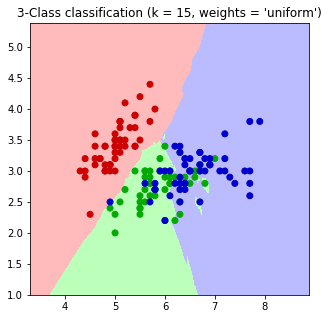

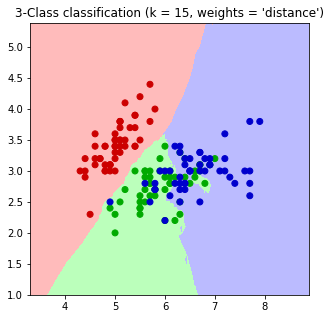

In [15]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:2]  # we only take the first two features
y = iris.target

h = 0.01 # step size in the mesh

# Points in a mesh of [x_min, m_max] x [y_min, y_max]
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

for weights in ['uniform', 'distance']:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

### Exercise / Unhomework 

- Which two features work best to predict the classes of the iris dataset?
- How much better/worse than using all features

### Other examples

More [exercises](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#examples-using-sklearn-neighbors-kneighborsclassifier) are available at http://scikit-learn.org

### Meaningful Distance?

- Need a [distance function](https://en.wikipedia.org/wiki/Distance#Mathematics)

> E.g., use Euclidean distance in $\mathbb{R}^d$

- Some examples

> $ \displaystyle \lVert X - Y \rVert_1 = \sum_{i=1}^{n} \lvert x_i - y_i \rvert $
>
> $ \displaystyle \lVert X - Y \rVert_2 = \left( \sum_{i=1}^{n} \lvert x_i - y_i \rvert^2 \right)^{1/2} $
>
> $ \displaystyle \lVert X - Y \rVert_p = \left( \sum_{i=1}^{n} \lvert x_i - y_i \rvert^p \right)^{1/p} \qquad 1 \le p < \infty $
>
> $ \displaystyle \lVert X - Y \rVert_\infty = \max_{i=1, \cdots, n} \lvert x_i - y_i \rvert $

- Problem with different features and units

> In practice, **centering** and **scaling** often helps <br/>
> Arguably, black art...


### Curse of Dimensionality

- Everybody is lonely in high dimensions

> Surface / Volume ratio grows <br/>as function of $d$, the dimension


<h1><font color="darkblue">Summary</font></h1>
<hr/>

### Procedure of [Nearest Neighbor](http://scikit-learn.org/stable/modules/neighbors.html)

- Data
> $ X = (x_{ij})_{n \times m} $

- For each data point with unknown label 
> Calculate its distance with data points with known label
>
> Find the nearest neighbor (minimal distance)

- Classify the unknown data point based on the label of the nearest neighbor

In [38]:
import datetime as dt

In [39]:
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target

In [51]:
# Example from Lecture
start = dt.datetime.now()

y_pred = -1 * np.ones(y.size)

# loop on query set
for i in arange(y.size): 
    
    d2min = 1e99                   # something large (initial)
    
    # loop on training set
    for j in arange(y.size):
        if i != j:                 # leave itself out
            d = X[i,:] - X[j,:]    # diff vector between data point i and data point j
            d2 = d.dot(d)          # calculate distance
            if d2 < d2min:         # check if data point j is closer to data point i than the previous data points
                d2min = d2         # if data point j is closer, set its' distance to be the new threshold
                y_pred[i] = y[j]   # use the label of the closest data point as the prediction
                
print('Number of mislabeled points out of a total %d points: %d' % (y.size, (y!=y_pred).sum()))
print('Elapsed time', dt.datetime.now() - start)

Number of mislabeled points out of a total 150 points: 6
Elapsed time 0:00:00.117087


- One way to accerlate

In [41]:
from scipy.spatial import distance_matrix

In [49]:
# Alternatively
start = dt.datetime.now()

# Calculate the distance matrix (150 x 150)
dist = distance_matrix(X, X, p=2)            # p: which Minkowski p-norm to use
np.fill_diagonal(dist, 1e99)                 # leave itself out

# Find the nearest neighbor
nn = np.argmin(dist, axis=1)

# Use the label of the closest data point as the prediction
y_pred = y[nn]

print('Number of mislabeled points out of a total %d points: %d' % (y.size, (y!=y_pred).sum()))
print('Elapsed time', dt.datetime.now() - start)

Number of mislabeled points out of a total 150 points: 6
Elapsed time 0:00:00.002108


### Procedure of [KNN](https://scikit-learn.org/stable/modules/neighbors.html#classification)

- Data
> $ X = (x_{ij})_{n \times m} $

- For each data point with unknown label 
> Calculate its distance with data points with known label
>
> Find the $ k $ nearest neighbor ($ k $ minimal distance)

- Classify the unknown data point based on the label of the $ k $ nearest neighbor (vote)
> Uniform: All points in each neighborhood are weighted equally
>
> Distance: Weight points by the inverse of their distance
>
> Self-defined

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target

In [45]:
# Toy Example
knn = pd.DataFrame()

for k in range(1,11):
    
    model1 = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2)   # p: which Minkowski p-norm to use
    model2 = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2) 
    
    cvscores1 = cross_val_score(model1, X, y, cv=10)
    cvscores2 = cross_val_score(model2, X, y, cv=10)
    
    # Save the result
    knn = knn.append(pd.DataFrame(data=[[k, 'uniform', cvscores1.mean()]], columns=['k','weights', '10-fold CV score']))
    knn = knn.append(pd.DataFrame(data=[[k, 'distance', cvscores2.mean()]], columns=['k','weights', '10-fold CV score']))

knn.index = arange(1,21)

In [46]:
knn

,k,weights,10-fold CV score
1,1,uniform,0.960000
2,1,distance,0.960000
3,2,uniform,0.953333
4,2,distance,0.960000
5,3,uniform,0.966667
6,3,distance,0.966667
7,4,uniform,0.966667
8,4,distance,0.966667
9,5,uniform,0.966667
10,5,distance,0.966667


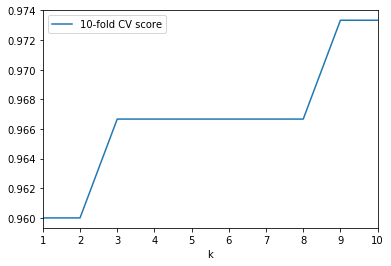

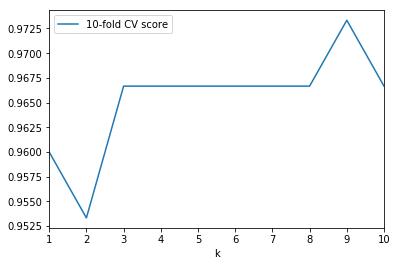

In [47]:
knn.groupby('weights').plot(x='k');